## ATSPy

#### Automated Models

1. ```ARIMA``` - Automated ARIMA Modelling
1. ```Prophet``` - Modeling Multiple Seasonality With Linear or Non-linear Growth
1. ```HWAAS``` - Exponential Smoothing With Additive Trend and Additive Seasonality
1. ```HWAMS``` - Exponential Smoothing with Additive Trend and Multiplicative Seasonality
1. ```PYAF``` - Feature Generating Model (slow and underforms)
1. ```NBEATS``` -  Neural basis expansion analysis (now fixed at 20 Epochs)
1. ```Gluonts``` - RNN-based Model (now fixed at 20 Epochs)
1. ```TATS``` - Seasonal and Trend no Box Cox
1. ```TBAT``` - Trend and Box Cox
1. ```TBATS1``` - Trend, Seasonal (one), and Box Cox
1. ```TBATP1``` - TBATS1 but Seasonal Inference is Hardcoded by Periodicity
1. ```TBATS2``` - TBATS1 With Two Seasonal Periods

#### Why AtsPy?

1. Implements all time series models in a unified manner by simply running ```AutomatedModel(df)```.

2. Automatically identify the seasonalities in your data using singular spectrum analysis, periodograms, and peak analysis.
3. Identifies and makes accessible the best model for your time series using in-sample validation methods.  
4. Combines the predictions of all these models in a simple (average) and complex (GBM) ensembles for improved performance.
5. Where appropriate models have been developed to use GPU resources to speed up the automation process.

In [1]:
!pip install atspy

     |████████████████████████████████| 2.1MB 2.5MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 327kB 41.6MB/s 
     |████████████████████████████████| 81kB 8.8MB/s 
     |████████████████████████████████| 337kB 41.7MB/s 
     |████████████████████████████████| 13.1MB 242kB/s 
     |████████████████████████████████| 488.3MB 35kB/s 
     |████████████████████████████████| 3.7MB 41.2MB/s 
     |████████████████████████████████| 10.4MB 35.3MB/s 
     |████████████████████████████████| 40kB 4.5MB/s 
     |████████████████████████████████| 1.5MB 32.3MB/s 
     |████████████████████████████████| 7.1MB 33.2MB/s 
     |████████████████████████████████| 225kB 43.6MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 412.3MB 44kB/s 
     |████████████████████████████████| 102kB 10.2MB/s 
     |████████████████████████████████| 753.4MB 24kB/s 
  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 22, 10
from atspy import AutomatedModel

INFO:root:Using GPU


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/firmai/random-assets-two/master/ts/monthly-beer-australia.csv")
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Megaliters
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [3]:
df.shape

(476, 1)

In [4]:
# Can try more models, named above, but it will take more time and resources
model_list=["HWAMS","HWAAS","TBAT","Prophet"]

# Predict for 
am = AutomatedModel(df = df , model_list=model_list, season="infer_from_data",forecast_len=60 )
forecast_in, performance = am.forecast_insample()
forecast_out = am.forecast_outsample()
all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
357
An insample split of training size 357 and testing size 119 has been constructed
Model HWAMS is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model TBAT is being trained for in sample prediction


INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Prophet is being trained for in sample prediction
Model HWAMS is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Model Prophet is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model HWAMS is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model TBAT is being trained for out of sample prediction


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Prophet is being trained for out of sample prediction
Model HWAMS is being used to forcast out of sample
Model HWAAS is being used to forcast out of sample
Model TBAT is being used to forcast out of sample
Model Prophet is being used to forcast out of sample
Successfully finished out of sample forecast
Building LightGBM Ensemble from TS data (ensemble_lgb)
Building LightGBM Ensemble from PCA reduced TSFresh Features (ensemble_ts). This can take a long time.
LightGBM ensemble have been successfully built
399  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble


In [5]:
# Forecasts for values in the dataset
forecast_in.head()

,Target,HWAMS,HWAAS,TBAT,Prophet
Date,,,,,
1985-10-01,181.6,161.962148,162.391653,148.410071,165.721046
1985-11-01,182.0,174.688055,173.191756,147.999237,174.372838
1985-12-01,190.0,189.728744,187.649575,147.589541,188.114748
1986-01-01,161.2,155.077205,154.817215,147.180980,160.074297
1986-02-01,155.5,148.054292,147.477692,146.773549,151.367905


In [6]:
# Forecasts for values outside the dataset
forecast_out.head()

,HWAMS,HWAAS,TBAT,Prophet
Date,,,,
1995-09-01,137.518755,137.133938,142.906275,142.459352
1995-10-01,164.136220,165.079612,142.865575,165.741008
1995-11-01,178.671684,180.009560,142.827110,172.920746
1995-12-01,184.175954,185.715043,142.790757,184.294509
1996-01-01,147.166448,147.440026,142.756399,152.490488


In [7]:
performance

,Target,HWAMS,HWAAS,TBAT,Prophet
rmse,0.000000,17.599400,18.993827,36.538009,14.422291
mse,0.000000,309.738878,360.765452,1335.026136,208.002487
mean,155.293277,142.399639,140.577496,126.590412,147.516428


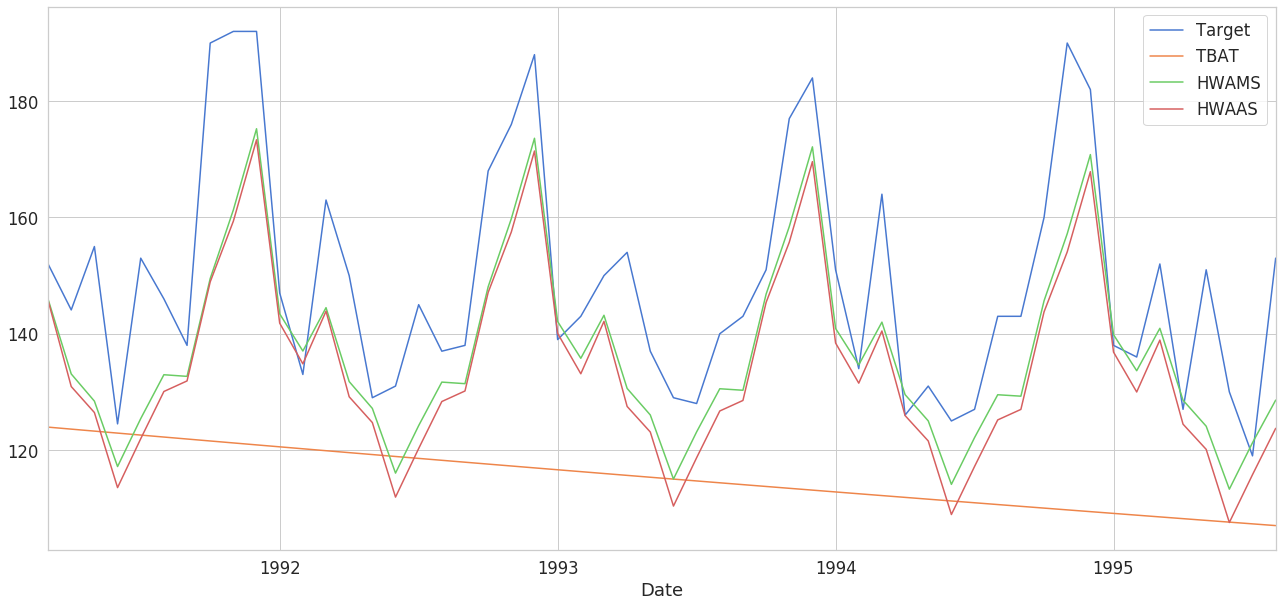

In [17]:
all_ensemble_in[["Target","TBAT","HWAMS","HWAAS"]].plot()

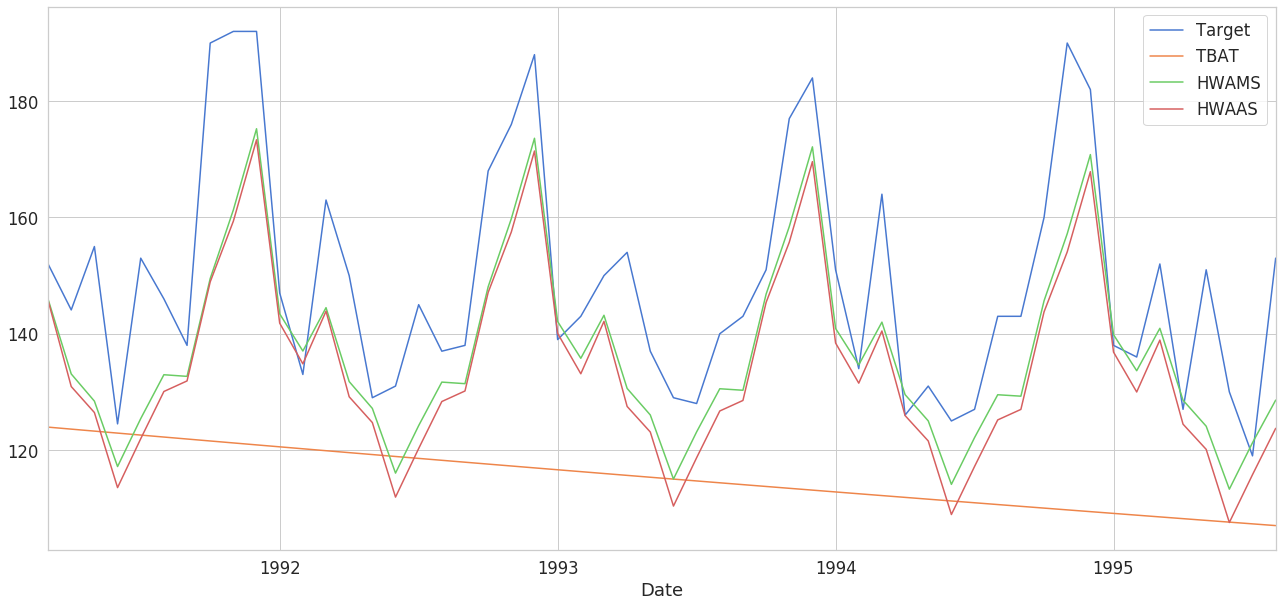

In [16]:
all_ensemble_in[["Target","TBAT","HWAMS","HWAAS"]].plot()